<a href="https://colab.research.google.com/github/akhil27/Akhil_INFO5731_SPRING2025/blob/main/Indraganti_Akhil_Assignment_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [4]:
import pandas as pd
import re

file_path = 'cleaned_ml_tweets.csv'
try:
    dataset = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please ensure 'cleaned_ml_tweets.csv' exists in the current directory.")
    exit()

print("Columns in dataset:", dataset.columns.tolist())

if 'tweet' in dataset.columns:
    text_list = dataset['tweet'].tolist()
elif 'text' in dataset.columns:
    text_list = dataset['text'].tolist()
else:
    print("No column named 'tweet' or 'text' found in the dataset.")
    exit()

def generate_ngrams(sentence, n):
    words = sentence.split()
    ngram_list = []
    for i in range(len(words) - n + 1):
        ngram = " ".join(words[i:i+n])
        ngram_list.append(ngram)
    return ngram_list

word_counts = {}
bigram_counts = {}
trigram_counts = {}

for text in text_list:
    words = text.split()
    for word in words:
        word_lower = word.lower()
        word_counts[word_lower] = word_counts.get(word_lower, 0) + 1

    bigrams = generate_ngrams(text, 2)
    for bigram in bigrams:
        bigram_lower = bigram.lower()
        bigram_counts[bigram_lower] = bigram_counts.get(bigram_lower, 0) + 1

    trigrams = generate_ngrams(text, 3)
    for trigram in trigrams:
        trigram_lower = trigram.lower()
        trigram_counts[trigram_lower] = trigram_counts.get(trigram_lower, 0) + 1

print("\nBigram Frequencies (Q1):")
print(bigram_counts)

print("\nTrigram Frequencies (Q1):")
print(trigram_counts)

bigram_probs = {}
for bigram, bigram_count in bigram_counts.items():
    first_word = bigram.split()[0]
    first_word_count = word_counts.get(first_word, 1)
    probability = bigram_count / first_word_count
    bigram_probs[bigram] = round(probability, 2)

print("\nBigram Probabilities (Q2):")
print(bigram_probs)

def find_noun_phrases(sentence):
    phrase_list = re.findall(r'\b[a-zA-Z]{3,}(?:\s+[a-zA-Z]{3,})*\b', sentence)
    return [phrase.lower() for phrase in phrase_list]

tweet_np_counts = []
max_np_counts = {}

for text in text_list:
    noun_phrases = find_noun_phrases(text)
    np_count_dict = {}
    for np in noun_phrases:
        np_count_dict[np] = np_count_dict.get(np, 0) + 1
    tweet_np_counts.append(np_count_dict)

    for np, count in np_count_dict.items():
        if np not in max_np_counts or count > max_np_counts[np]:
            max_np_counts[np] = count

noun_phrase_list = list(max_np_counts.keys())

table_entries = []
num_texts = min(100, len(text_list))
for i in range(num_texts):
    row_data = {}
    np_count_dict = tweet_np_counts[i]
    for np in noun_phrase_list:
        if np in np_count_dict:
            relative_prob = np_count_dict[np] / max_np_counts[np]
            row_data[np] = round(relative_prob, 2)
        else:
            row_data[np] = 0
    table_entries.append(row_data)

df_noun_phrases = pd.DataFrame(table_entries, index=[f"text_{i}" for i in range(num_texts)])
print("\nNoun Phrase Relative Probabilities Table (Q3):")
print(df_noun_phrases)


Columns in dataset: ['tweet_id', 'created_at', 'author_id', 'text', 'likes', 'retweets', 'cleaned_text']

Bigram Frequencies (Q1):
{"if you're": 1, "you're passionate": 1, 'passionate about': 1, 'about data': 1, 'data science,': 1, 'science, analytics,': 1, 'analytics, and': 1, 'and career': 1, 'career growth,': 1, "growth, let's": 1, "let's connect!": 1, 'connect! 📌': 1, '📌 i': 1, 'i regularly': 1, 'regularly share': 1, 'share insights,': 1, 'insights, job': 1, 'job opportunities,': 1, 'opportunities, and': 1, 'and learning': 1, 'learning resources.': 1, 'resources. 🔗': 1, '🔗 let’s': 1, 'let’s connect:': 1, 'connect: #ai': 1, '#ai #ml': 28, '#ml #artificialintelligence': 1, '#artificialintelligence #machinelearning': 5, '#machinelearning #datascience': 5, '#datascience #trending': 1, 'eight forces': 1, 'forces that': 1, 'that will': 1, 'will shape': 1, 'shape the': 1, 'the future': 4, 'future cities': 1, 'cities by': 1, 'by #internetofthings': 1, '#internetofthings #smartcity': 1, '#s

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [5]:
import pandas as pd
import re
import math

file_path = 'cleaned_ml_tweets.csv'
try:
    dataset = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please ensure 'cleaned_ml_tweets.csv' exists in the current directory.")
    exit()

print("Available columns in dataset:", dataset.columns.tolist())

if 'tweet' in dataset.columns:
    documents = dataset['tweet'].tolist()
elif 'text' in dataset.columns:
    documents = dataset['text'].tolist()
else:
    print("No suitable column ('tweet' or 'text') found in the dataset.")
    exit()

def process_text(text):
    text = text.lower()
    words = re.findall(r'\w+', text)
    return words

tokenized_docs = [process_text(doc) for doc in documents]
doc_count = len(tokenized_docs)
print("Total documents (Q1):", doc_count)

unique_terms = set()
doc_term_freq = []

for tokens in tokenized_docs:
    term_freq = {}
    for token in tokens:
        unique_terms.add(token)
        term_freq[token] = term_freq.get(token, 0) + 1
    doc_term_freq.append(term_freq)

term_list = sorted(list(unique_terms))
term_count = len(term_list)
print("Vocabulary size (Q1):", term_count)

doc_freq = {}
for term in term_list:
    doc_freq[term] = sum(1 for doc in tokenized_docs if term in doc)

inverse_doc_freq = {}
for term in term_list:
    inverse_doc_freq[term] = math.log(doc_count / doc_freq[term])

tf_idf_matrix = []
for doc in doc_term_freq:
    doc_vector = {}
    for term in term_list:
        tf_value = doc.get(term, 0)
        doc_vector[term] = tf_value * inverse_doc_freq[term]
    tf_idf_matrix.append(doc_vector)

print("\nTF-IDF weights for each document (Q1):")
for i, vector in enumerate(tf_idf_matrix):
    filtered_vector = {term: round(weight, 2) for term, weight in vector.items() if abs(weight) > 1e-6}
    print(f"Document {i}:", filtered_vector)

query_text = "An Outstanding movie with a haunting performance and best character development"
query_tokens = process_text(query_text)

query_term_freq = {}
for token in query_tokens:
    query_term_freq[token] = query_term_freq.get(token, 0) + 1

query_vector = {}
for term in term_list:
    tf_value = query_term_freq.get(term, 0)
    query_vector[term] = tf_value * inverse_doc_freq.get(term, 0)

def compute_cosine_similarity(vec1, vec2):
    dot_product = 0
    norm1 = 0
    norm2 = 0
    for term in term_list:
        v1 = vec1.get(term, 0)
        v2 = vec2.get(term, 0)
        dot_product += v1 * v2
        norm1 += v1 ** 2
        norm2 += v2 ** 2
    if norm1 == 0 or norm2 == 0:
        return 0
    return dot_product / (math.sqrt(norm1) * math.sqrt(norm2))

document_similarities = []
for i, doc_vec in enumerate(tf_idf_matrix):
    similarity = compute_cosine_similarity(doc_vec, query_vector)
    document_similarities.append((i, similarity))

document_similarities_sorted = sorted(document_similarities, key=lambda x: x[1], reverse=True)

print("\nDocuments ranked by relevance to the query (Q2):")
for i, similarity in document_similarities_sorted:
    print(f"Document {i}: Similarity = {similarity:.4f}")


Available columns in dataset: ['tweet_id', 'created_at', 'author_id', 'text', 'likes', 'retweets', 'cleaned_text']
Total documents (Q1): 100
Vocabulary size (Q1): 924

TF-IDF weights for each document (Q1):
Document 0: {'about': 3.22, 'ai': 0.27, 'analytics': 3.22, 'and': 2.69, 'artificialintelligence': 2.3, 'career': 4.61, 'connect': 9.21, 'data': 2.12, 'datascience': 1.11, 'growth': 4.61, 'i': 3.0, 'if': 3.91, 'insights': 3.22, 'job': 4.61, 'learning': 2.66, 'let': 9.21, 'machinelearning': 1.39, 'opportunities': 4.61, 'passionate': 4.61, 're': 3.91, 'regularly': 4.61, 'resources': 3.91, 's': 3.22, 'science': 3.51, 'share': 3.91, 'trending': 4.61, 'you': 2.81}
Document 1: {'4ir': 4.61, 'by': 2.81, 'cc': 3.22, 'cities': 4.61, 'eight': 4.61, 'forces': 4.61, 'future': 3.22, 'industry40': 3.91, 'internetofthings': 4.61, 'machinelearning': 1.39, 'shape': 4.61, 'smartcity': 4.61, 'that': 3.22, 'the': 0.92, 'will': 2.66}
Document 2: {'ai': 0.55, 'aijobs': 3.0, 'aitalent': 3.0, 'be': 3.0, 'ch

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

(Q1) Total number of documents: 100
(Q1) Word2Vec training complete. Vocabulary size: 50


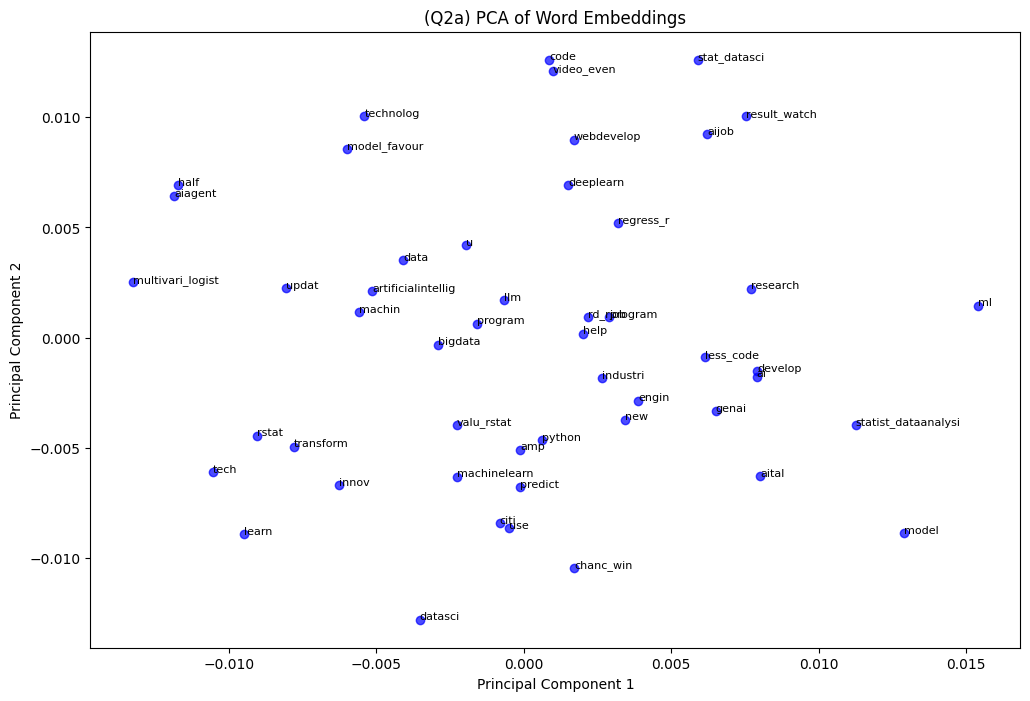

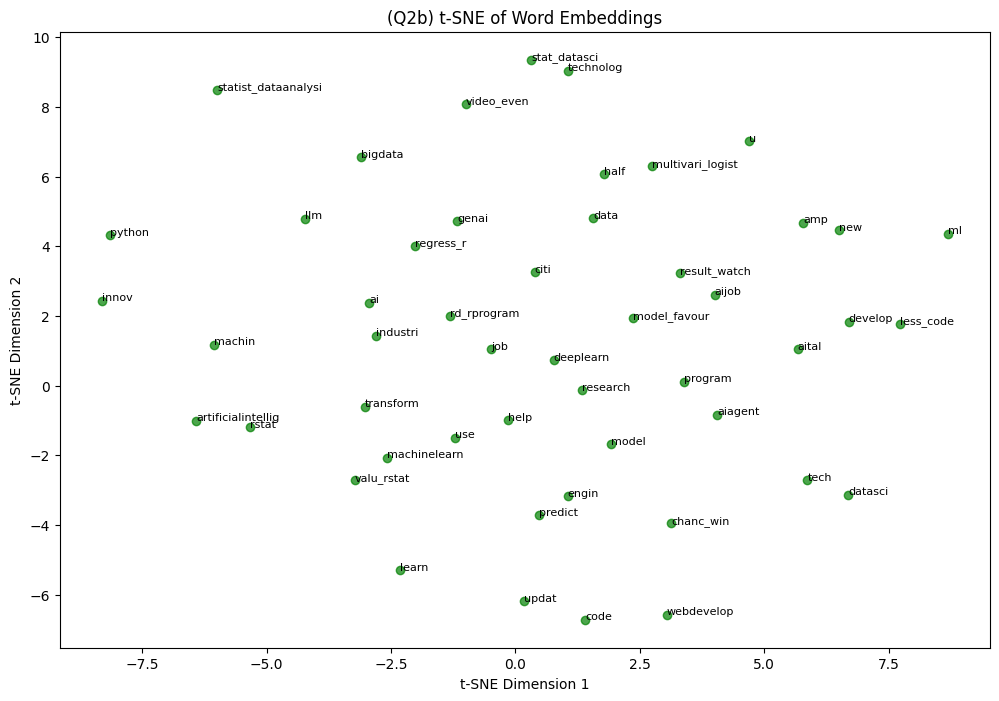


(Q3) Cosine Similarities between selected word pairs:
    Similarity between 'ai' and 'ml': 0.1250
    One or both words not found in vocabulary: 'machine', 'learning'
    One or both words not found in vocabulary: 'deep', 'learning'
    One or both words not found in vocabulary: 'data', 'science'
    One or both words not found in vocabulary: 'artificial', 'intelligence'
    One or both words not found in vocabulary: 'python', 'coding'
    One or both words not found in vocabulary: 'analytics', 'statistics'
    One or both words not found in vocabulary: 'big', 'data'
    One or both words not found in vocabulary: 'cloud', 'computing'
    One or both words not found in vocabulary: 'neural', 'network'


In [37]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tweet_dataset = pd.read_csv('cleaned_ml_tweets.csv')
print(f"(Q1) Total number of documents: {len(tweet_dataset)}")
tweet_tokens = [text.split() for text in tweet_dataset['cleaned_text']]
tweet_bigrams = Phrases(tweet_tokens, min_count=5, threshold=10)
tweet_bigram_model = Phraser(tweet_bigrams)
tweet_tokens_bigram = [tweet_bigram_model[sent] for sent in tweet_tokens]
tweet_word2vec = Word2Vec(
    sentences=tweet_tokens_bigram,
    vector_size=300,
    window=5,
    min_count=5,
    sg=1,
    workers=4
)
print(f"(Q1) Word2Vec training complete. Vocabulary size: {len(tweet_word2vec.wv)}")

top_100_tokens = tweet_word2vec.wv.index_to_key[:100]
token_vectors = np.array([tweet_word2vec.wv[token] for token in top_100_tokens])

pca_transformer = PCA(n_components=2)
pca_coords = pca_transformer.fit_transform(token_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(pca_coords[:, 0], pca_coords[:, 1], color='blue', alpha=0.7)
for i, token in enumerate(top_100_tokens):
    plt.annotate(token, xy=(pca_coords[i, 0], pca_coords[i, 1]), fontsize=8)
plt.title('(Q2a) PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

tsne_transformer = TSNE(n_components=2, random_state=42, perplexity=15, max_iter=300)
tsne_coords = tsne_transformer.fit_transform(token_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], color='green', alpha=0.7)
for i, token in enumerate(top_100_tokens):
    plt.annotate(token, xy=(tsne_coords[i, 0], tsne_coords[i, 1]), fontsize=8)
plt.title('(Q2b) t-SNE of Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

tokens_pair = [
    ('ai', 'ml'),
    ('machine', 'learning'),
    ('deep', 'learning'),
    ('data', 'science'),
    ('artificial', 'intelligence'),
    ('python', 'coding'),
    ('analytics', 'statistics'),
    ('big', 'data'),
    ('cloud', 'computing'),
    ('neural', 'network')
]

print("\n(Q3) Cosine Similarities between selected word pairs:")
for token1, token2 in tokens_pair:
    if token1 in tweet_word2vec.wv and token2 in tweet_word2vec.wv:
        similarity = tweet_word2vec.wv.similarity(token1, token2)
        print(f"    Similarity between '{token1}' and '{token2}': {similarity:.4f}")
    else:
        print(f"    One or both words not found in vocabulary: '{token1}', '{token2}'")


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
"""
1. Which NLP Task Would You Like to Perform on the Dataset?
Sentiment Analysis represents the most suitable NLP task for analyzing the dataset annotated_tweets.csv.
The dataset includes "sentiment" annotations such as positive, neutral, and negative since it already has identified sentiment labels.
Sentiment Analysis enables validation of classifications while building sentiment classification models or tracking sentiments related to topics such as AI, ML and technology.

2. Explain your labeling Schema you have used and mention those labels
The dataset utilizes a sentiment labeling schema which divides data points into three main categories.

Positive: Tweets that express optimism, excitement, or approval.
Example: "Eugene shares exciting plans for AI and ML technologies to lower compute costs."

Neutral: Tweets with factual statements and no evident emotional language will display these characteristics.
Example: "Cybersecurity threats? Inbox me for help."

Negative: Tweets which deliver criticism along with expressions of concern and pessimistic sentiment.
Example: "AI's hidden cost: Will data preparation break your budget?"

This schema system uses specific categories to identify tweets according to their emotional characteristics.


Sentiment Analysis attains the best results since it corresponds with current dataset labels while delivering usable information about public feelings toward fields such as AI and ML.
The analysis helps to enhance automated sentiment recognition algorithms and reveals present-day popular sentiments about new technology developments. """


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer